# importing libraries and data

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [154]:
%matplotlib inline

In [155]:
path = r'C:\Users\simpe\Citi Bike Analysis'

In [156]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_6.csv'), index_col = False)

In [157]:
citi.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-08-14 18:18:55
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-08-14 18:38:53
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-08-14 19:44:04
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-08-14 11:54:37
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-08-14 22:01:01


In [158]:
citi.shape

(41017, 20)

In [159]:
# Getting rid of unesseary columns
citi=citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [160]:
citi.shape

(41017, 19)

# Cleaning and Manipulating Data

In [161]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [162]:
file_path = os.path.join(path, '02 Data','prepared data','citi_6.csv')

In [163]:
parse_dates = ['ride_start_date']

In [164]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [165]:
citi.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-08-14 18:18:55
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-08-14 18:38:53
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-08-14 19:44:04
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-08-14 11:54:37
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-08-14 22:01:01


In [166]:
citi=citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [167]:
# Rides 

In [168]:
# Rides per day
day_counts = citi.groupby('day_of_week')['ride_start_date'].count()

In [169]:
day_counts

day_of_week
Fri    6320
Mon    6492
Sat    4676
Sun    5190
Thu    5972
Tue    6168
Wed    6199
Name: ride_start_date, dtype: int64

In [170]:
# Avg trip duration by day
day_avg_duration = citi.groupby('day_of_week')['trip_duration'].mean()

In [171]:
day_avg_duration

day_of_week
Fri    696.092405
Mon    689.296519
Sat    710.915526
Sun    723.140848
Thu    687.640656
Tue    683.814364
Wed    692.401355
Name: trip_duration, dtype: float64

In [172]:
# Merging DF together

In [173]:
result = pd.DataFrame({'day_of_week': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': day_avg_duration.values})

In [174]:
result

,day_of_week,ride_count,avg_duration
0,Fri,6320,696.092405
1,Mon,6492,689.296519
2,Sat,4676,710.915526
3,Sun,5190,723.140848
4,Thu,5972,687.640656
5,Tue,6168,683.814364
6,Wed,6199,692.401355


In [175]:
# Avg age of rider by day
day_avg_age = citi.groupby('day_of_week')['birth_year'].mean()

In [176]:
day_avg_age

day_of_week
Fri    1975.559177
Mon    1975.486445
Sat    1976.988024
Sun    1976.918882
Thu    1975.230576
Tue    1975.254053
Wed    1975.291983
Name: birth_year, dtype: float64

In [177]:
# Merging it together
result_1 = pd.DataFrame({'day_of_week': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': day_avg_duration.values,'avg_age':day_avg_age.values})

In [178]:
result_1

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6320,696.092405,1975.559177
1,Mon,6492,689.296519,1975.486445
2,Sat,4676,710.915526,1976.988024
3,Sun,5190,723.140848,1976.918882
4,Thu,5972,687.640656,1975.230576
5,Tue,6168,683.814364,1975.254053
6,Wed,6199,692.401355,1975.291983


In [179]:
# Hour

In [180]:
#rides per hour
hour_counts_1 = citi.groupby('start_hour')['ride_start_date'].count()

In [181]:
hour_counts_1

start_hour
0      403
1      257
2      158
3       90
4       73
5      191
6      863
7     1908
8     3023
9     2504
10    1759
11    1747
12    2258
13    2306
14    2259
15    2316
16    2866
17    4122
18    4041
19    2817
20    1848
21    1319
22    1109
23     780
Name: ride_start_date, dtype: int64

In [182]:
# Avg trip duration by hour
hour_avg_duration = citi.groupby('start_hour')['trip_duration'].mean()

In [183]:
hour_avg_duration

start_hour
0     677.868486
1     647.210117
2     620.936709
3     584.422222
4     616.589041
5     570.586387
6     598.979143
7     668.484277
8     705.284155
9     668.774760
10    681.419557
11    675.744133
12    666.543401
13    679.187771
14    693.548915
15    705.407599
16    713.957083
17    722.178554
18    741.052215
19    720.935037
20    708.226190
21    707.300986
22    674.930568
23    686.223077
Name: trip_duration, dtype: float64

In [184]:
# Merging together
hour_result = pd.DataFrame({'start_hour': hour_counts_1.index, 'ride_count': hour_counts_1.values, 'avg_duration': hour_avg_duration.values})

In [185]:
hour_result

,start_hour,ride_count,avg_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041
5,5,191,570.586387
6,6,863,598.979143
7,7,1908,668.484277
8,8,3023,705.284155
9,9,2504,668.774760


In [186]:
# adding avg age 
result_2 = pd.DataFrame({'start_hour': hour_counts_1.index, 'ride_count': hour_counts_1.values, 'avg_duration': hour_avg_duration.values, 'avg_age': hour_avg_age.values})

In [187]:
result_2

,start_hour,ride_count,avg_duration,avg_age
0,0,403,677.868486,1979.364764
1,1,257,647.210117,1979.521401
2,2,158,620.936709,1978.848101
3,3,90,584.422222,1981.111111
4,4,73,616.589041,1974.657534
5,5,191,570.586387,1975.727749
6,6,863,598.979143,1974.477404
7,7,1908,668.484277,1974.099057
8,8,3023,705.284155,1974.921270
9,9,2504,668.774760,1974.972045


In [188]:
# hour of ride count by day
hour_counts = citi.groupby([citi['start_hour'], citi['ride_start_date'].dt.date])['ride_start_date'].count()

In [189]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         14
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         12
                               ..
23          2013-09-26         38
            2013-09-27         42
            2013-09-28         47
            2013-09-29         21
            2013-09-30         16
Name: ride_start_date, Length: 711, dtype: int64

In [190]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [191]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,13.433333
1,1,8.566667
2,2,5.448276
3,3,3.461538
4,4,2.703704
5,5,6.586207
6,6,28.766667
7,7,63.600000
8,8,100.766667
9,9,83.466667


In [192]:
#avg age of rider on each hour
hour_avg_age = citi.groupby('start_hour')['birth_year'].mean()

In [193]:
hour_avg_age

start_hour
0     1979.364764
1     1979.521401
2     1978.848101
3     1981.111111
4     1974.657534
5     1975.727749
6     1974.477404
7     1974.099057
8     1974.921270
9     1974.972045
10    1974.802729
11    1974.760160
12    1975.172276
13    1975.002602
14    1975.042497
15    1974.935665
16    1974.916609
17    1975.317807
18    1976.312051
19    1977.108271
20    1978.429113
21    1978.040940
22    1978.482417
23    1978.702564
Name: birth_year, dtype: float64

In [194]:
result_1

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6320,696.092405,1975.559177
1,Mon,6492,689.296519,1975.486445
2,Sat,4676,710.915526,1976.988024
3,Sun,5190,723.140848,1976.918882
4,Thu,5972,687.640656,1975.230576
5,Tue,6168,683.814364,1975.254053
6,Wed,6199,692.401355,1975.291983


In [195]:
result_2

,start_hour,ride_count,avg_duration,avg_age
0,0,403,677.868486,1979.364764
1,1,257,647.210117,1979.521401
2,2,158,620.936709,1978.848101
3,3,90,584.422222,1981.111111
4,4,73,616.589041,1974.657534
5,5,191,570.586387,1975.727749
6,6,863,598.979143,1974.477404
7,7,1908,668.484277,1974.099057
8,8,3023,705.284155,1974.921270
9,9,2504,668.774760,1974.972045


# Young generation does late night rides.

In [196]:
# hour of ride count by day
hour_counts = citi.groupby([citi['start_hour'], citi['ride_start_date'].dt.date])['ride_start_date'].count()

In [197]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         14
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         12
                               ..
23          2013-09-26         38
            2013-09-27         42
            2013-09-28         47
            2013-09-29         21
            2013-09-30         16
Name: ride_start_date, Length: 711, dtype: int64

In [198]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [199]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,13.433333
1,1,8.566667
2,2,5.448276
3,3,3.461538
4,4,2.703704
5,5,6.586207
6,6,28.766667
7,7,63.600000
8,8,100.766667
9,9,83.466667


In [200]:
#avg age of rider on each hour
hour_avg_age = citi.groupby('start_hour')['birth_year'].mean()

In [201]:
hour_avg_age

start_hour
0     1979.364764
1     1979.521401
2     1978.848101
3     1981.111111
4     1974.657534
5     1975.727749
6     1974.477404
7     1974.099057
8     1974.921270
9     1974.972045
10    1974.802729
11    1974.760160
12    1975.172276
13    1975.002602
14    1975.042497
15    1974.935665
16    1974.916609
17    1975.317807
18    1976.312051
19    1977.108271
20    1978.429113
21    1978.040940
22    1978.482417
23    1978.702564
Name: birth_year, dtype: float64

In [202]:
result_1

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6320,696.092405,1975.559177
1,Mon,6492,689.296519,1975.486445
2,Sat,4676,710.915526,1976.988024
3,Sun,5190,723.140848,1976.918882
4,Thu,5972,687.640656,1975.230576
5,Tue,6168,683.814364,1975.254053
6,Wed,6199,692.401355,1975.291983


In [203]:
result_2

,start_hour,ride_count,avg_duration,avg_age
0,0,403,677.868486,1979.364764
1,1,257,647.210117,1979.521401
2,2,158,620.936709,1978.848101
3,3,90,584.422222,1981.111111
4,4,73,616.589041,1974.657534
5,5,191,570.586387,1975.727749
6,6,863,598.979143,1974.477404
7,7,1908,668.484277,1974.099057
8,8,3023,705.284155,1974.921270
9,9,2504,668.774760,1974.972045


# Elbow Tech

In [206]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [207]:
score = [kmeans[i].fit(result_2).score(result_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-33537693.980744734,
 -9455981.928056188,
 -4017960.5667220782,
 -1889939.1156131232,
 -878412.6161215112,
 -356398.9811256247,
 -199937.26363942065,
 -139984.53832306748,
 -101269.75583639526]

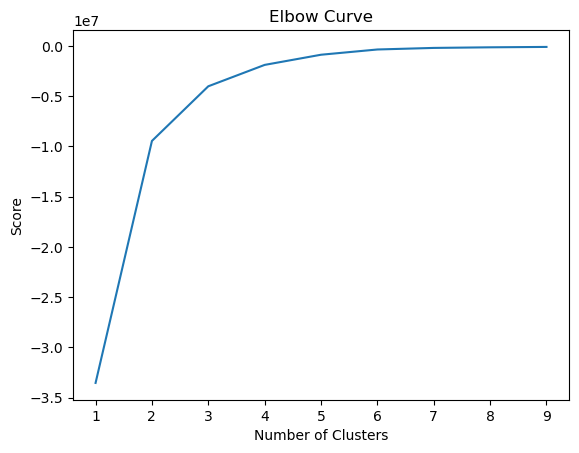

In [208]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# I will choose 4 clusters based on the curve of the chart

# K Means

In [209]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [210]:
# Fit the k-means object to the data.
kmeans.fit(result_2)

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [211]:
result_2['clusters'] = kmeans.fit_predict(result_2)

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [212]:
result_2.head()

,start_hour,ride_count,avg_duration,avg_age,clusters
0,0,403,677.868486,1979.364764,1
1,1,257,647.210117,1979.521401,1
2,2,158,620.936709,1978.848101,1
3,3,90,584.422222,1981.111111,1
4,4,73,616.589041,1974.657534,1


In [213]:
#cluster count
result_2['clusters'].value_counts()

clusters
1    8
3    8
0    6
2    2
Name: count, dtype: int64

In [214]:
by_hour = result_2[['ride_count','avg_duration','avg_age']]

In [215]:
by_hour

,ride_count,avg_duration,avg_age
0,403,677.868486,1979.364764
1,257,647.210117,1979.521401
2,158,620.936709,1978.848101
3,90,584.422222,1981.111111
4,73,616.589041,1974.657534
5,191,570.586387,1975.727749
6,863,598.979143,1974.477404
7,1908,668.484277,1974.099057
8,3023,705.284155,1974.921270
9,2504,668.774760,1974.972045


# Elbow Tech again

In [216]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 
# Defines k-means clusters in the range assigned above.

In [217]:
score = [kmeans[i].fit(by_hour).score(by_hour) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-33536543.980744734,
 -9454966.328056188,
 -4016982.300055412,
 -1889254.28227979,
 -878011.1161215112,
 -356007.114458958,
 -199594.39697275395,
 -139653.67165640078,
 -100955.08916972858]

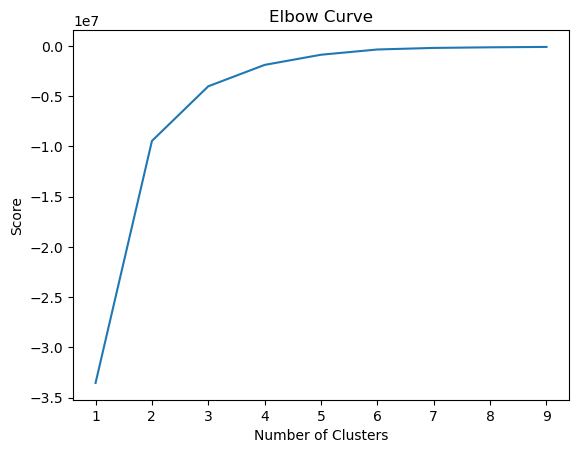

In [218]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4 clusters based on visualization

# kmeans

In [220]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [221]:
# Fit the k-means object to the data.
kmeans.fit(by_hour)

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [222]:
by_hour['clusters'] = kmeans.fit_predict(by_hour)

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\simpe\AppData\Local\Temp\ipykernel_19148\2371176289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_hour['clusters'] = kmeans.fit_predict(by_hour)


In [223]:
by_hour.head()

,ride_count,avg_duration,avg_age,clusters
0,403,677.868486,1979.364764,1
1,257,647.210117,1979.521401,1
2,158,620.936709,1978.848101,1
3,90,584.422222,1981.111111,1
4,73,616.589041,1974.657534,1


In [224]:
#cluster count
by_hour['clusters'].value_counts()

clusters
1    8
0    8
3    6
2    2
Name: count, dtype: int64

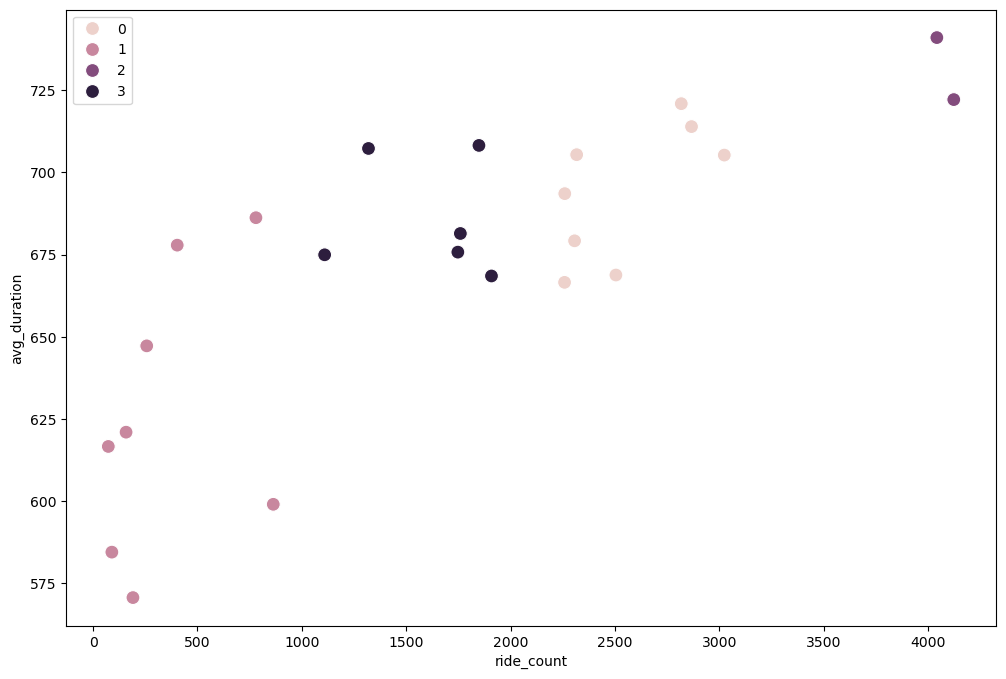

In [225]:
# ride count and avg duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['ride_count'], y=by_hour['avg_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ride_count') # Label x-axis.
plt.ylabel('avg_duration') # Label y-axis.
plt.show()

# When it's a busier time, the average ride duration usually increases, which makes sense.

# Descriptive statistics on group by DF

In [226]:
by_hour.loc[by_hour['clusters'] == 0, 'cluster'] = 'light pink'
by_hour.loc[by_hour['clusters'] == 1, 'cluster'] = 'pink'
by_hour.loc[by_hour['clusters'] == 2, 'cluster'] = 'purple'
by_hour.loc[by_hour['clusters'] == 3, 'cluster'] = 'dark purple'

In [227]:
by_hour.groupby('cluster').agg({'ride_count':['mean', 'median'], 
                         'avg_duration':['mean', 'median'], 
                         'avg_age':['mean', 'median']})

ride_count         avg_duration                  avg_age  \
                  mean  median         mean      median         mean   
cluster                                                                
dark purple   1615.000  1753.0   686.017618  678.581845  1976.435736   
light pink    2543.625  2410.0   694.204840  699.416535  1975.258904   
pink           351.875   224.0   625.351898  618.762875  1977.801329   
purple        4081.500  4081.5   731.615384  731.615384  1975.814929   

                          
                  median  
cluster                   
dark purple  1976.421834  
light pink   1974.987323  
pink         1978.775333  
purple       1975.814929

# The average ages and ride durations are not that signifigant in the clusters

# -- the ride counts vary greatly -- You can see in dark purple where the most people are taking rides they are also taking the longest rides

# This could be helpful in an analytics pipeline of you divided the DF into gender or subscribers to see if the cluster trends are similar or the same. It is also set up for days of the week. This coul dbe good to see if these clusters are over arching or vary due to various categorical constructs.

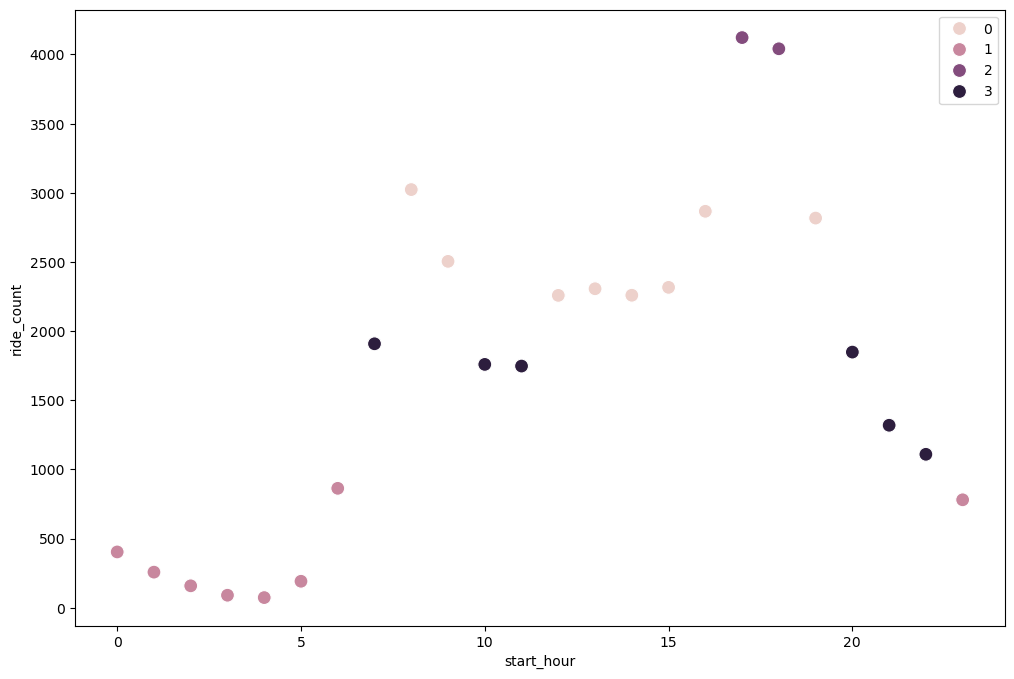

In [230]:
# start hour and ride count
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['ride_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('ride_count') # Label y-axis.
plt.show()


# I'm not certain if using k-means here is appropriate since 'hour' isn't a numeric variable. However, this analysis still highlights a pattern: ride counts are low during the early morning hours, increase starting around 6 AM, and peak at 9 AM. There's a slight dip, followed by another rise with a peak between 5-6 PM, and then a gradual decrease through the night. This suggests that most bike usage occurs before and after work hours.

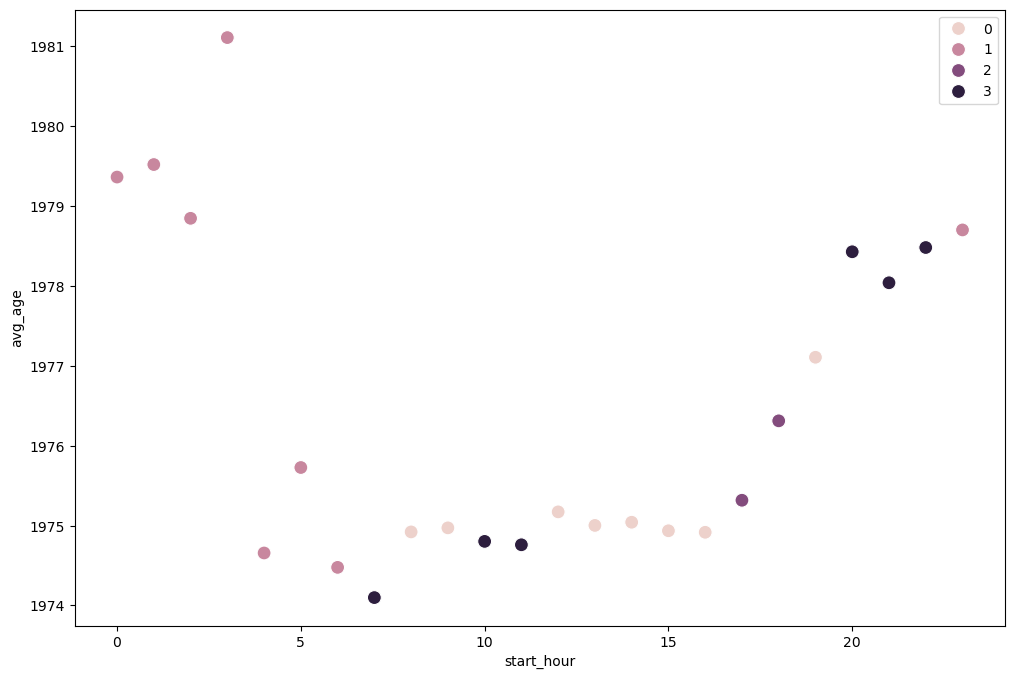

In [231]:
# start hour and avg age
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()

# Younger generation customers preper riding at the late night hours

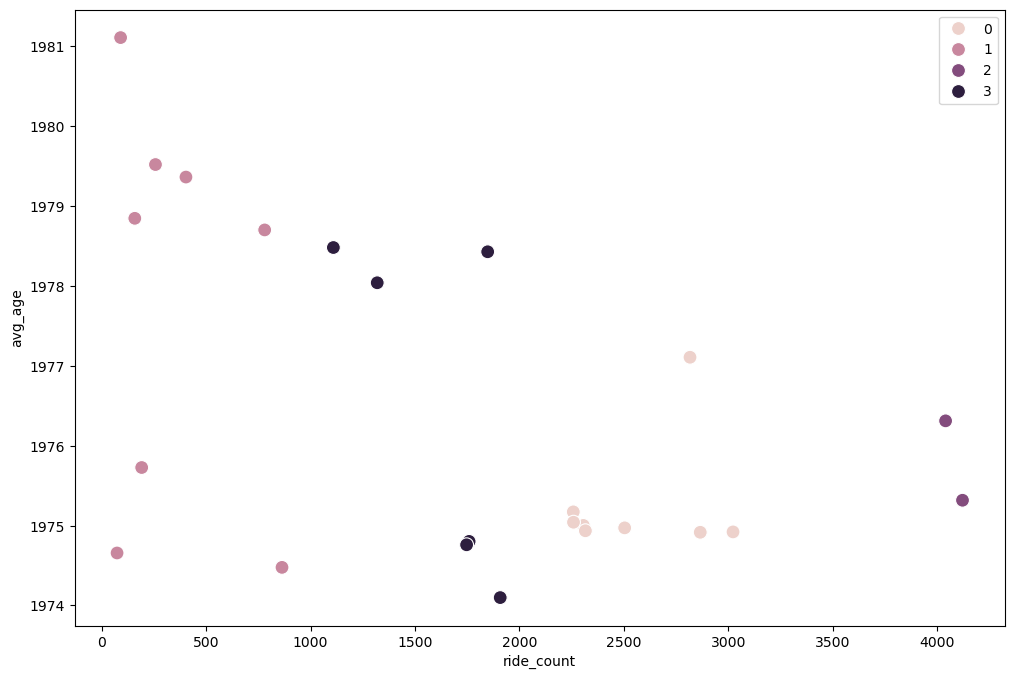

In [232]:
# Plot the clusters 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['ride_count'], y=by_hour['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ride_count') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()


# This one probably make the least sense. but maybe that younger riders go on rides more often that older riders in the off peal times of day

In [233]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(by_hour)

# Accessing the cluster labels
cluster_labels = kmeans.labels_

ValueError: could not convert string to float: 'pink'

In [234]:
# Plot the clusters 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['avg_duration'], y=by_hour['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('avg_duration') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

<Figure size 1200x800 with 0 Axes>

# Older riders then to take longer rides

In [235]:
citi_3=citi[[ 'trip_duration', 'birth_year']]

In [236]:
citi_3

,trip_duration,birth_year
0,993,1968.0
1,581,1983.0
2,361,1989.0
3,561,1988.0
4,427,1986.0
...,...,...
41012,975,1973.0
41013,1541,1975.0
41014,1191,1970.0
41015,1050,1961.0


# Elbow Tech

In [238]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [239]:
score = [kmeans[i].fit(citi_3).score(citi_3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\clust

[-6740526088.44659,
 -1995927266.971432,
 -953012121.9229873,
 -554765219.6300904,
 -367489512.7615496,
 -257527728.7291884,
 -193061889.05863133,
 -151017236.35154063,
 -120292415.32380085]

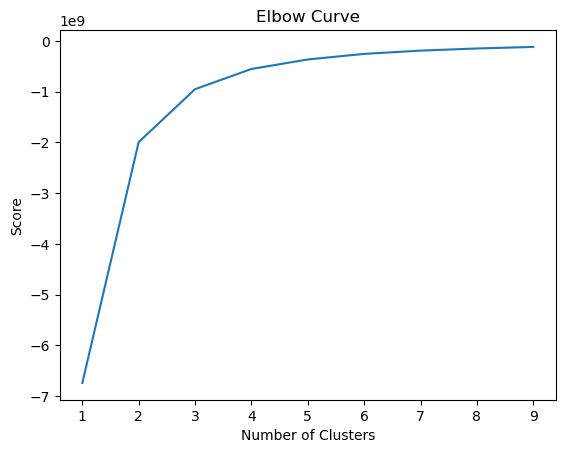

In [240]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [241]:
# 5 clusters
# kmeans
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [242]:
kmeans.fit(citi_3)

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [243]:
citi_3['clusters'] = kmeans.fit_predict(citi_3)

C:\Users\simpe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\simpe\AppData\Local\Temp\ipykernel_19148\3806875805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citi_3['clusters'] = kmeans.fit_predict(citi_3)


In [244]:
citi_3.head()

,trip_duration,birth_year,clusters
0,993,1968.0,2
1,581,1983.0,3
2,361,1989.0,0
3,561,1988.0,3
4,427,1986.0,3


In [245]:
citi_3['clusters'].value_counts()

clusters
3    12263
0    11926
2     8379
1     5282
4     3167
Name: count, dtype: int64

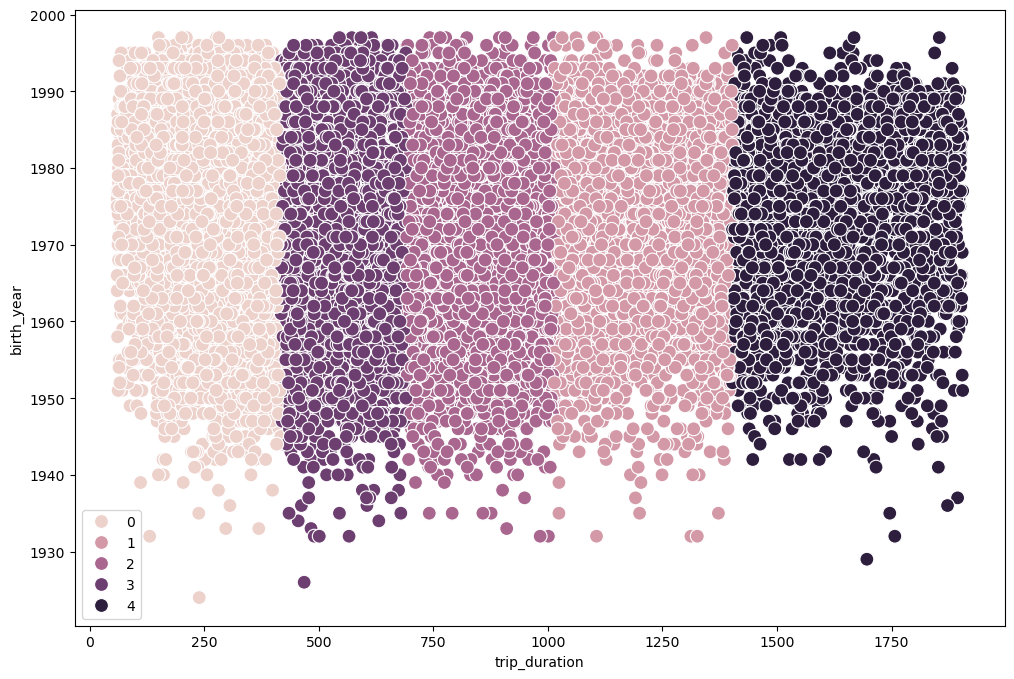

In [246]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_3['trip_duration'], y=citi_3['birth_year'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('trip_duration') # Label x-axis.
plt.ylabel('birth_year') # Label y-axis.
plt.show()

In [247]:
citi.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-08-14 18:18:55
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-08-14 18:38:53
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-08-14 19:44:04
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-08-14 11:54:37
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-08-14 22:01:01


# Saving to CSV

In [248]:
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_7.csv'))